Data visualization - Feature Selection - Random Forest (ToxinsbaseClass) - ex.4 - Adam Trentowski, 162602

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('D:/Projekty/DataVisualization/lab_04/files/ToxinsbaseClass.csv')
data.head()

,Latitude,Longitude,MaximumDepth,SecchiDepth,Sampling Depth,T_Surf,T_Epi,Zeu / Zmix,BuoyFreq,TP,...,MC_dmRR,MC_RR,MC_dmLR,MC_LR,CYN,ATX,ToxinRichness,TDI,TTC,Toxicity
0,46.673750,6.322253,18.0,1.05,10.5,22.5,21.1,0.21,0.01,0.02,...,0.000,0.0,0.001,0.000,0.0,0.0,2,0.42,0.001,1
1,46.514161,6.773583,13.0,1.60,9.0,20.4,19.3,0.50,0.01,0.09,...,0.000,0.0,0.003,0.004,0.0,0.0,3,1.05,0.009,1
2,46.354617,6.152489,3.5,3.50,3.0,26.0,25.9,2.00,0.00,0.12,...,0.000,0.0,0.002,0.019,0.0,0.0,3,0.39,0.021,1
3,47.287447,8.211500,48.0,1.75,12.0,23.9,19.4,0.52,0.01,0.02,...,0.302,0.0,0.290,0.005,0.0,0.0,4,1.00,0.668,2
4,46.638953,6.286464,32.0,4.00,11.0,21.5,19.7,0.91,0.01,0.07,...,0.090,0.0,0.056,0.003,0.0,0.0,4,1.07,0.177,2


In [7]:
X = data.iloc[:, 0:21]  # remove TTC
y = data.iloc[:, 22]
features_names = data.columns

In [11]:
print(f'Features Shape: {data.shape}')

Features Shape: (137, 23)


In [12]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [13]:
importances = rf.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(feature, importance)

Latitude  0.004373101278542566
Longitude  0.005550584847266967
MaximumDepth  0.009114408171923792
SecchiDepth  0.004007420002755814
Sampling Depth  0.006591637561845319
T_Surf  0.005285472842887268
T_Epi  0.0034946888930606286
Zeu / Zmix 0.002830122719644579
BuoyFreq 0.0001345688701064084
TP  0.004793504400903829
TN  0.0022933210622813976
Chlorophyl_a  0.00667039872901182
MC_YR  0.2702015714269156
MC_dmRR  0.06441231686616591
MC_RR  0.0854103161713571
MC_dmLR  0.395818210412345
MC_LR  0.07343979652461965
CYN  0.013239057153551963
ATX  0.004478199248960212
ToxinRichness 0.03105396251876383
TDI 0.0068073402970903595


In [14]:
importances = list(rf.feature_importances_)

features_importances = [(feature, round(importance, 3)) for feature, importance in zip(X.columns, importances)]

In [15]:
features_importances = sorted(features_importances, key=lambda x: x[1], reverse=True)

In [16]:
[print('Variable: {}, Importance: {}'.format(*pair)) for pair in features_importances];

Variable: MC_dmLR , Importance: 0.396
Variable: MC_YR , Importance: 0.27
Variable: MC_RR , Importance: 0.085
Variable: MC_LR , Importance: 0.073
Variable: MC_dmRR , Importance: 0.064
Variable: ToxinRichness, Importance: 0.031
Variable: CYN , Importance: 0.013
Variable: MaximumDepth , Importance: 0.009
Variable: Sampling Depth , Importance: 0.007
Variable: Chlorophyl_a , Importance: 0.007
Variable: TDI, Importance: 0.007
Variable: Longitude , Importance: 0.006
Variable: T_Surf , Importance: 0.005
Variable: TP , Importance: 0.005
Variable: Latitude , Importance: 0.004
Variable: SecchiDepth , Importance: 0.004
Variable: ATX , Importance: 0.004
Variable: T_Epi , Importance: 0.003
Variable: Zeu / Zmix, Importance: 0.003
Variable: TN , Importance: 0.002
Variable: BuoyFreq, Importance: 0.0


In [17]:
estimator_rf = ensemble.RandomForestRegressor(
    n_jobs=-1,
    n_estimators=100,
    random_state=42
)

In [18]:
estimator_rf.fit(X, y)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [19]:
features_importance_df = pd.DataFrame(estimator_rf.feature_importances_, index=X.columns.values, columns=['Importance'])
features_importance_df.head()

,Importance
Latitude,0.004373
Longitude,0.005551
MaximumDepth,0.009114
SecchiDepth,0.004007
Sampling Depth,0.006592


In [20]:
features_importance_df.sort_values(by='Importance', inplace=True, ascending=False)
features_importance_df.head()

,Importance
MC_dmLR,0.395818
MC_YR,0.270202
MC_RR,0.085410
MC_LR,0.073440
MC_dmRR,0.064412


<Axes: >

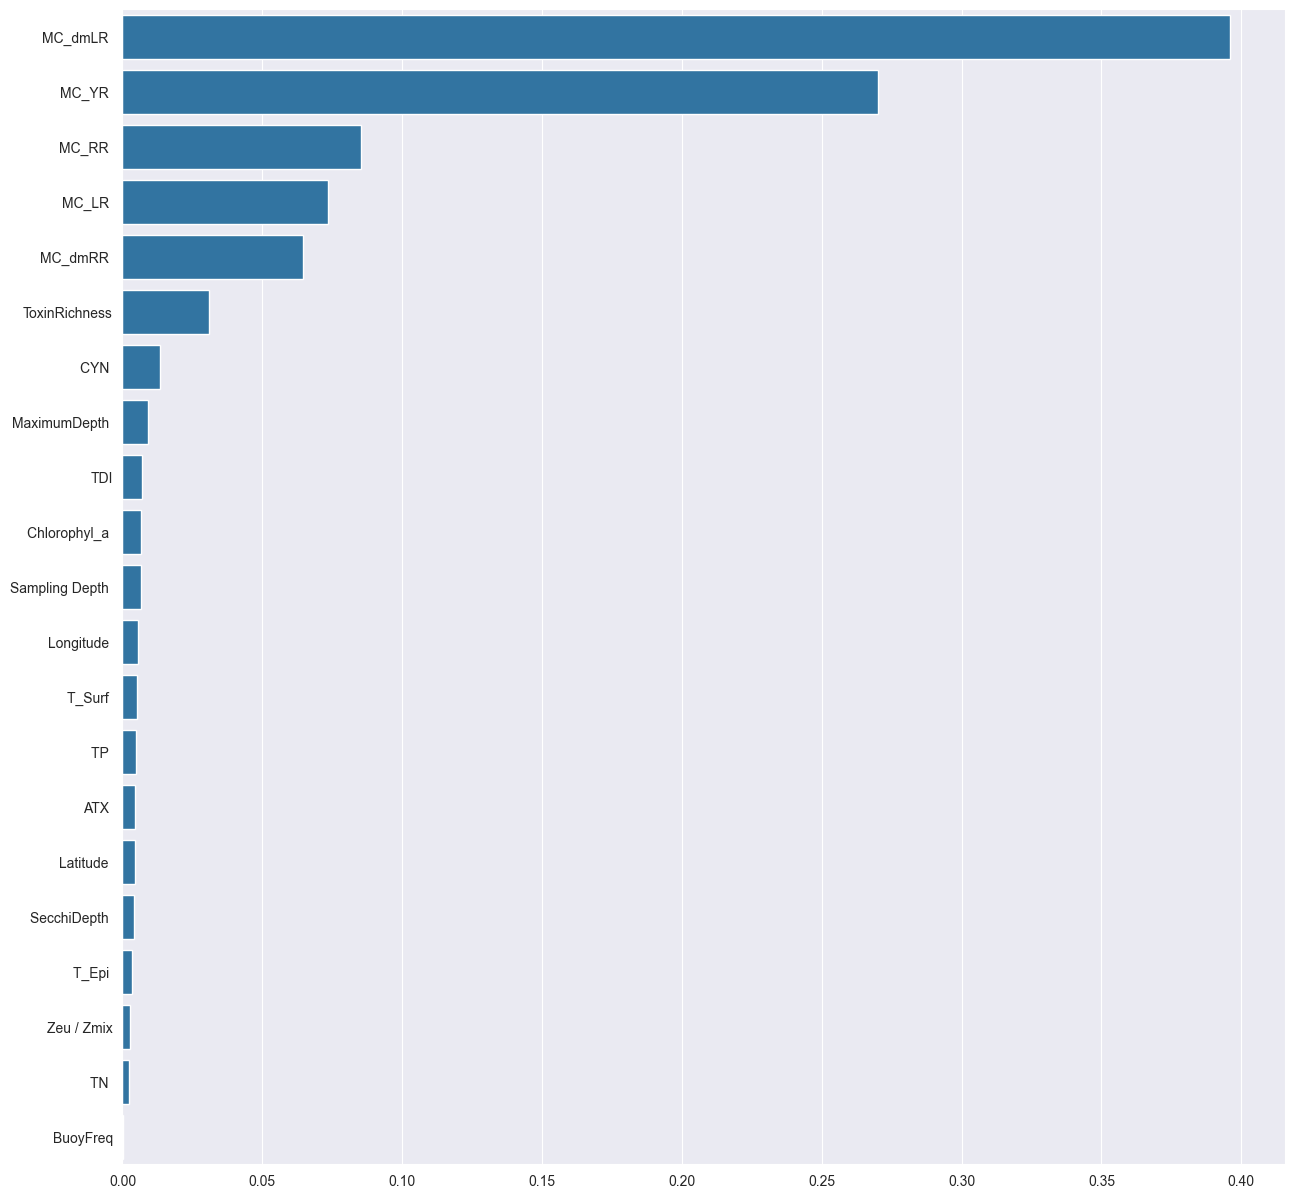

In [21]:
plt.figure(figsize=(15, 15))
sns.barplot(data=features_importance_df, x=features_importance_df.values.flatten(),
            y=features_importance_df.index.values)